# Intro
We said a lot about our data access, Milinnium run and queries and databases we used in the [Data_Description.](https://github.com/Machine-Learning-in-Structure-formation/NLSFML/blob/master/Data/Data_Description.md#simple-analysis-of-data)
You can review our codes, plots and other results here.

# Generating our IN and OUT classes

For the first step we should make our classes from the initial particle data that we had,"IN" and "OUT" classes. we couldn't run an exact query for getting the information straight from the database because of the limit in the gate's openning time, so we collected the information about all the particles which exists in halos with np>1600 at z=0 and we traced these particles into z=127 by running a python code:

In [1]:
import pandas as pd
#importing the particles which are in a halo with mass more than 1600 particle
df = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\IN_Halo.csv', skiprows = 9)
print(df)

         particleId       subhaloId     np  redshift
0                12  63000200000653   3194       0.0
1                44  63000200000653   3194       0.0
2                45  63000200000653   3194       0.0
3                46  63000200000653   3194       0.0
4                51  63000200000653   3194       0.0
...             ...             ...    ...       ...
5578115    19682988  63000100000091  25323       0.0
5578116    19682991  63000100000091  25323       0.0
5578117    19682993  63000100000091  25323       0.0
5578118    19682999  63000100000091  25323       0.0
5578119    19683000  63000100000091  25323       0.0

[5578120 rows x 4 columns]


In [2]:
import numpy as np
df = np.array(df)
particleID = df[:,0]
halo = df[:,1:3:1]
print(particleID)
print(halo)

[1.2000000e+01 4.4000000e+01 4.5000000e+01 ... 1.9682993e+07 1.9682999e+07
 1.9683000e+07]
[[6.30002e+13 3.19400e+03]
 [6.30002e+13 3.19400e+03]
 [6.30002e+13 3.19400e+03]
 ...
 [6.30001e+13 2.53230e+04]
 [6.30001e+13 2.53230e+04]
 [6.30001e+13 2.53230e+04]]


In [3]:
#finding all the IDs and mass of halos bigger than 1600 particles
halo = np.unique(halo , axis=0)
print(halo)
#number of such halos:
num_halo = len(halo)
print(num_halo)

[[6.30000e+13 5.19840e+04]
 [6.30000e+13 2.53500e+03]
 [6.30000e+13 4.02770e+04]
 ...
 [6.30007e+13 1.72900e+03]
 [6.30007e+13 1.60400e+03]
 [6.30007e+13 1.65600e+03]]
706


In [6]:
#Importing the data of particles in first snap number z = 127
particles = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\Snap0.csv', skiprows = 14)
print(particles)

          snapnum  phkey         x          y          z         vx  \
0               0      0  0.079177   0.003392   0.416711   6.259036   
1               0      0  0.289189   0.130278   0.456327   7.491590   
2               0      0  0.262699   0.197281   0.224564  32.359110   
3               0      0  0.240575   0.396040   0.038927  67.365524   
4               0      0  0.408888   0.367119   0.182086 -14.317771   
...           ...    ...       ...        ...        ...        ...   
19682995        0      0  0.285719   0.102112   0.024742  36.839947   
19682996        0  28086  0.338755  62.488060  62.102010  21.432320   
19682997        0  32767  0.396658   0.143351  62.302100  30.167624   
19682998        0  32767  0.155790   0.036591  62.291122  68.368500   
19682999        0      0  0.052702   0.014002   0.020630  72.956330   

                 vy          vz        id  
0        -202.86237   43.663280         1  
1        -184.12308   35.697285         2  
2        -205.8

In [10]:
#we want to make a column, In_Halo which saves the information about particles in z=127,in a way that shows if this particle is in a halo at z=0 or not
# 0 for OUT halo
# 1 for IN halo

particles['In_halo'] = particles.id.isin(particleID).astype(int)
print (particles)
print( len(particles[particles['In_halo'] == 1]))

          snapnum  phkey         x          y          z         vx  \
0               0      0  0.079177   0.003392   0.416711   6.259036   
1               0      0  0.289189   0.130278   0.456327   7.491590   
2               0      0  0.262699   0.197281   0.224564  32.359110   
3               0      0  0.240575   0.396040   0.038927  67.365524   
4               0      0  0.408888   0.367119   0.182086 -14.317771   
...           ...    ...       ...        ...        ...        ...   
19682995        0      0  0.285719   0.102112   0.024742  36.839947   
19682996        0  28086  0.338755  62.488060  62.102010  21.432320   
19682997        0  32767  0.396658   0.143351  62.302100  30.167624   
19682998        0  32767  0.155790   0.036591  62.291122  68.368500   
19682999        0      0  0.052702   0.014002   0.020630  72.956330   

                 vy          vz        id  In_halo  
0        -202.86237   43.663280         1        0  
1        -184.12308   35.697285         2

In [12]:
particles.to_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\particles_information.csv' , sep = ',' , encoding='utf-8', index=False)

You can see that another column, named IN_halo, added to the data which contain the information about IN and OUT classes.
1 is for the particles which end up into a halo with np >1600 in z=0 (nearly 5 milion particles) and 0 is for the others.

**Visualizing IN and OUT classes:**

We made our IN and OUT classes, and to get better understanding we plotted their spatial distribution in the early time z=127, IN class particles are about 5 milions and showed with purple, OUT class particles are about 19 milion and showed with yellow color.

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

df = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\particles_information.csv')
print(df)


          snapnum  phkey         x          y          z         vx  \
0               0      0  0.079177   0.003392   0.416711   6.259036   
1               0      0  0.289189   0.130278   0.456327   7.491590   
2               0      0  0.262699   0.197281   0.224564  32.359110   
3               0      0  0.240575   0.396040   0.038927  67.365524   
4               0      0  0.408888   0.367119   0.182086 -14.317771   
...           ...    ...       ...        ...        ...        ...   
19682995        0      0  0.285719   0.102112   0.024742  36.839947   
19682996        0  28086  0.338755  62.488060  62.102010  21.432320   
19682997        0  32767  0.396658   0.143351  62.302100  30.167624   
19682998        0  32767  0.155790   0.036591  62.291122  68.368500   
19682999        0      0  0.052702   0.014002   0.020630  72.956330   

                 vy          vz        id  In_halo  
0        -202.86237   43.663280         1        0  
1        -184.12308   35.697285         2

In [14]:
import numpy as np
particles = np.array(df)
print(particles)
X_pos = particles[:,2]
Y_pos = particles[:,3]
Z_pos = particles[:,4]
color = particles[:,9]

[[0.0000000e+00 0.0000000e+00 7.9177044e-02 ... 4.3663280e+01
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.8918898e-01 ... 3.5697285e+01
  2.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.6269868e-01 ... 9.1230120e+01
  3.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 3.2767000e+04 3.9665824e-01 ... 2.3600888e+02
  1.9682998e+07 0.0000000e+00]
 [0.0000000e+00 3.2767000e+04 1.5579028e-01 ... 2.4638330e+02
  1.9682999e+07 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 5.2702278e-02 ... 2.1974171e+02
  1.9683000e+07 1.0000000e+00]]


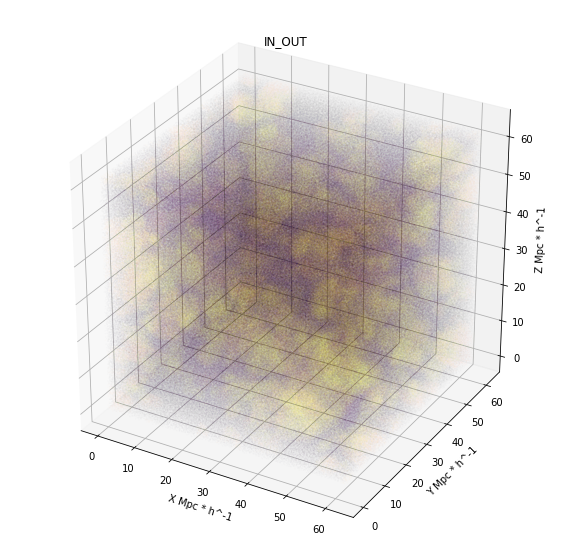

1


In [15]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


title = 'IN_OUT'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Y_pos[0::10], Z_pos[0::10] ,s = 0.0001, c = color[0::10])

ax.set_xlabel('X Mpc * h^-1')
ax.set_ylabel('Y Mpc * h^-1')
ax.set_zlabel('Z Mpc * h^-1')

plt.show()
fig.savefig('{}.png'.format(title))
print(1)

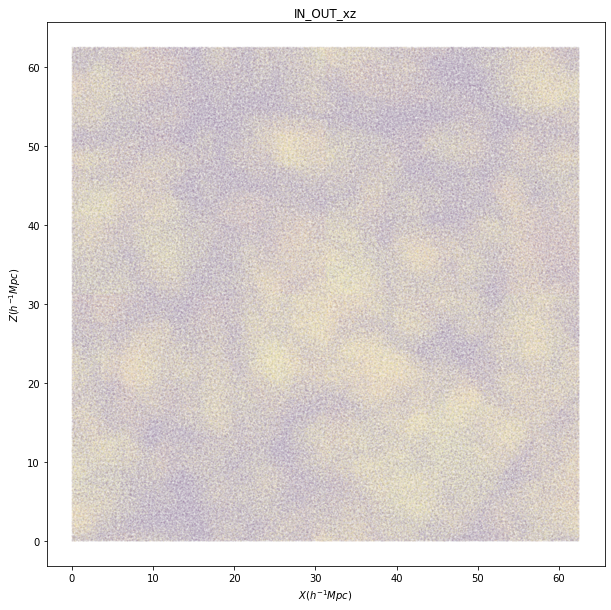

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


title = 'IN_OUT_xz'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Z_pos[0::10] ,s = 0.0001, c = color[0::10])

ax.set_xlabel('$X (h^{-1} Mpc)$')
ax.set_ylabel('$Z (h^{-1} Mpc)$')

plt.show()
fig.savefig('{}.png'.format(title))


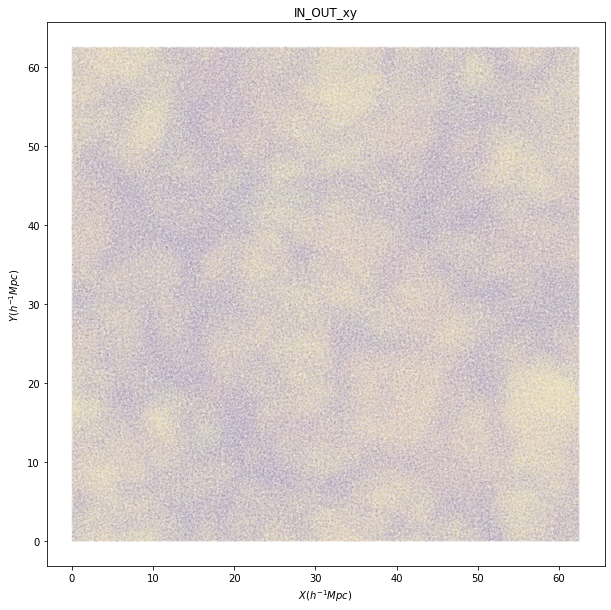

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


title = 'IN_OUT_xy'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Y_pos[0::10] ,s = 0.0001, c = color[0::10])

ax.set_xlabel('$X (h^{-1} Mpc)$')
ax.set_ylabel('$Y (h^{-1} Mpc)$')

plt.show()
fig.savefig('{}.png'.format(title))

# Simple analysis of the data

In order to visualize our data we plotted some histograms, you can see them as follows. These are the analysis of particle datas.

**Halo Mass histogram:**

we defined our halo class in a way that the minimum mass for a halo is equal to 1600 particles. as can be seen in the plots below, the number of halos with mass less than 10000 particles is much more than the bigger ones, as we expected from our cosmology. Total number of halos with np more than 1600 is also 706, while the total number of halos in the box (including the lighter ones) is around 37000.

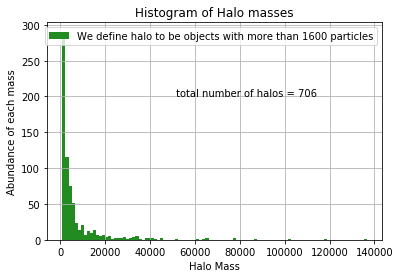

706


In [5]:
#plotting the histogram of halo mass
import matplotlib.pyplot as plt

plt.hist(halo[:,1], bins=100, align='left', color= 'forestgreen', label='We define halo to be objects with more than 1600 particles')

plt.title('Histogram of Halo masses')
plt.xlabel('Halo Mass')
plt.ylabel('Abundance of each mass')
plt.text(50000, 200, ' total number of halos = {}'.format(num_halo))
plt.grid(True)
plt.legend()
plt.savefig('Histogram_of_halo_masses')
plt.show()
print(len(halo[:,1]))

**Particles Spatial and Velocity Distribution:**

As all of our features can be derived from sinematic features of the particle, it will be quite meaningfull to us to visualizing this data in order to trace halo distribution in the space and their velocities in order to get a sense of their important features.

**Snap 63, z = 0**

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\Snap63.csv', skiprows = 15)
print(df)

          63  11683  60.513615  57.290844  4.772299  -0.22465438  -5.7350774  \
0         63  11684  61.288437  57.917194  4.846988    30.724203  141.896470   
1         63  11684  61.215515  57.685158  4.934363  -276.196200 -260.795840   
2         63  11684  61.391360  57.647366  4.883800   209.604400 -122.346650   
3         63  11684  60.941130  57.284206  4.731247   163.197510  139.767800   
4         63  11684  61.336327  57.707290  4.949532  -120.630710   -4.445282   
...       ..    ...        ...        ...       ...          ...         ...   
19682994  63  11684  61.193550  57.672424  4.937500  -353.355770 -274.261700   
19682995  63  11684  61.192220  57.680786  4.947290  -110.912605 -368.737460   
19682996  63  11684  61.188393  57.699337  4.970048  -283.084870 -283.901520   
19682997  63  11684  61.091007  57.561863  4.989381   471.892730  645.953700   
19682998  63  11684  61.065823  57.592220  5.007216  -236.079770 -569.003660   

            97.09575         1  
0     

In [3]:
import numpy as np
df = np.array(df)
X_pos = df[:,2]
Y_pos = df[:,3]
Z_pos = df[:,4]
print(X_pos)
print(Y_pos)
print(Z_pos)

[61.288437 61.215515 61.39136  ... 61.188393 61.091007 61.065823]
[57.917194 57.685158 57.647366 ... 57.699337 57.561863 57.59222 ]
[4.8469877 4.9343634 4.8838005 ... 4.9700484 4.9893813 5.0072155]


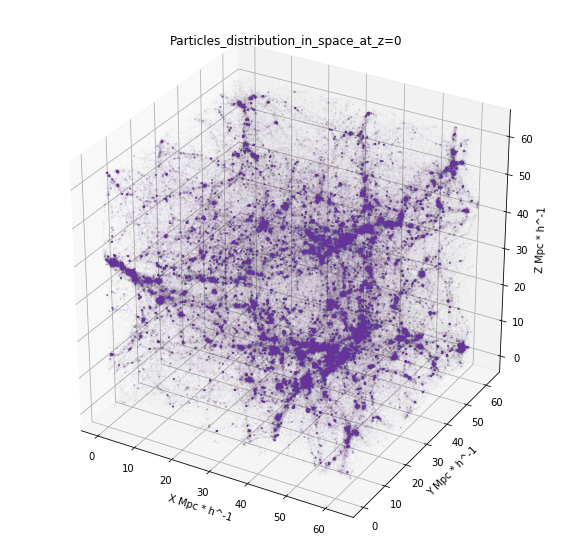

1


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#as th resolution of the simulation is 5 kpc we take the size of our particles to be:
ps = 5 * 1000 / (60 * 10^6)
# load some test data for demonstration and plotting
title = 'Particles_distribution_in_space_at_z=0'
ax.set_title(title)
ax.scatter(X_pos[0::10], Y_pos[0::10], Z_pos[0::10], s = 0.0001 , color = 'rebeccapurple')
ax.set_xlabel('X Mpc * h^-1')
ax.set_ylabel('Y Mpc * h^-1')
ax.set_zlabel('Z Mpc * h^-1')
fig.savefig('{}.png'.format(title))
plt.show()
print(1)

Also the velocity fields can be seen for snap = 63 below:

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full particle Data\Snap63.csv', skiprows = 14)
print(df)


          snapnum  phkey          x          y         z          vx  \
0              63  11683  60.513615  57.290844  4.772299   -0.224654   
1              63  11684  61.288437  57.917194  4.846988   30.724203   
2              63  11684  61.215515  57.685158  4.934363 -276.196200   
3              63  11684  61.391360  57.647366  4.883800  209.604400   
4              63  11684  60.941130  57.284206  4.731247  163.197510   
...           ...    ...        ...        ...       ...         ...   
19682995       63  11684  61.193550  57.672424  4.937500 -353.355770   
19682996       63  11684  61.192220  57.680786  4.947290 -110.912605   
19682997       63  11684  61.188393  57.699337  4.970048 -283.084870   
19682998       63  11684  61.091007  57.561863  4.989381  471.892730   
19682999       63  11684  61.065823  57.592220  5.007216 -236.079770   

                  vy          vz        id  
0          -5.735077   97.095750         1  
1         141.896470   -5.809572         2  


In [2]:
import numpy as np
df = np.array(df)
X_pos = df[:,2]
Y_pos = df[:,3]
Z_pos = df[:,4]
Vx = df[:,5]
Vy = df[:,6]
Vz = df[:,7]
print('X:{}' .format(X_pos))
print('Y:{}' .format(Y_pos))
print('Z:{}' .format(Z_pos))
print('Vx:{}' .format(Vx))
print('Vy:{}' .format(Vy))
print('Vz:{}' .format(Vz))

X:[60.513615 61.288437 61.215515 ... 61.188393 61.091007 61.065823]
Y:[57.290844 57.917194 57.685158 ... 57.699337 57.561863 57.59222 ]
Z:[4.772299  4.8469877 4.9343634 ... 4.9700484 4.9893813 5.0072155]
Vx:[-2.2465438e-01  3.0724203e+01 -2.7619620e+02 ... -2.8308487e+02
  4.7189273e+02 -2.3607977e+02]
Vy:[  -5.7350774  141.89647   -260.79584   ... -283.90152    645.9537
 -569.00366  ]
Vz:[ 97.09575    -5.8095717  12.719741  ... 250.57599   256.81473
 492.6174   ]


In [3]:
len_V = np.sqrt(Vx**2 + Vy**2 + Vz**2)
print(len_V)

[ 97.2652366  145.30084642 380.07973225 ... 472.78477497 840.17422998
 788.77799518]


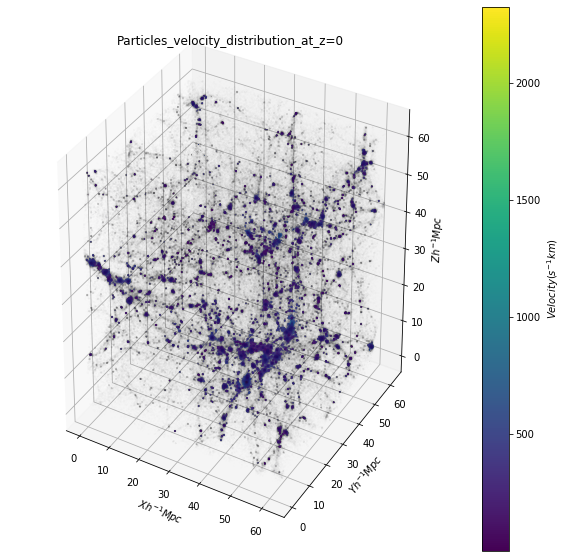

1


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#as th resolution of the simulation is 5 kpc we take the size of our particles to be:
ps = 5 * 1000 / (60 * 10^6)
# load some test data for demonstration and plotting

title = 'Particles_velocity_distribution_at_z=0'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Y_pos[0::10], Z_pos[0::10] ,s = 0.00001, c = len_V[0::10])

ax.set_xlabel('$X h^{-1} Mpc$')
ax.set_ylabel('$Y h^{-1} Mpc$')
ax.set_zlabel('$Z h^{-1} Mpc$')

cb = fig.colorbar(p)
cb.set_label('$Velocity (s^{-1} km)$')
cb.mappable.set_clim([min(len_V),max(len_V)])

plt.show()
fig.savefig('{}.png'.format(title))
print(1)

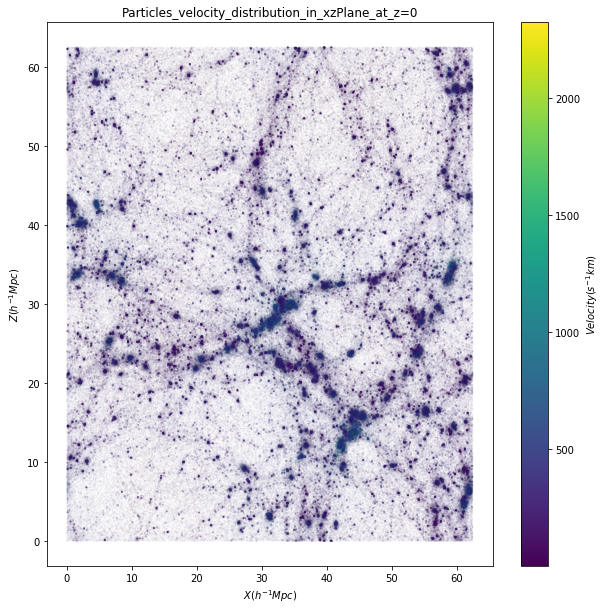

In [6]:
#plotiing the distribution and velocities in the x-z plane


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

#as th resolution of the simulation is 5 kpc we take the size of our particles to be:
ps = 5 * 1000 / (60 * 10^6)
# load some test data for demonstration and plotting

title = 'Particles_velocity_distribution_in_xzPlane_at_z=0'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Z_pos[0::10] ,s = 0.0001, c = len_V[0::10])

ax.set_xlabel('$X (h^{-1} Mpc)$')
ax.set_ylabel('$Z (h^{-1} Mpc)$')

cb = fig.colorbar(p)
cb.set_label('$Velocity (s^{-1} km)$')
cb.mappable.set_clim([min(len_V),max(len_V)])

plt.show()
fig.savefig('{}.png'.format(title))


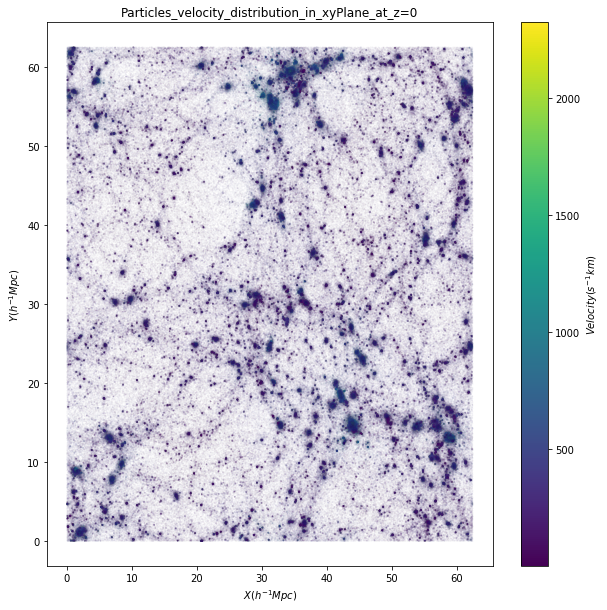

In [7]:
#plotiing the distribution and velocities in the x-y plane


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

#as th resolution of the simulation is 5 kpc we take the size of our particles to be:
ps = 5 * 1000 / (60 * 10^6)
# load some test data for demonstration and plotting

title = 'Particles_velocity_distribution_in_xyPlane_at_z=0'
ax.set_title(title)
p = ax.scatter(X_pos[0::10], Y_pos[0::10] ,s = 0.0001, c = len_V[0::10])

ax.set_xlabel('$X (h^{-1} Mpc)$')
ax.set_ylabel('$Y (h^{-1} Mpc)$')

cb = fig.colorbar(p)
cb.set_label('$Velocity (s^{-1} km)$')
cb.mappable.set_clim([min(len_V),max(len_V)])

plt.show()
fig.savefig('{}.png'.format(title))

As can be seen most of the particles has a velocity around 100-500 km/s, while those near to center of halos has larger velocities you can see them with a brighter blue color. the maximum velocity of a particle in our dataset were around 2000 km/s but the number of particles with such a high velocities is quite low.

**Other Snapshots:**

For other snapshots we run the same code and you can see the result for their spatial distribution with the information of velocity below: 

**Snap 10, z = 16.7**

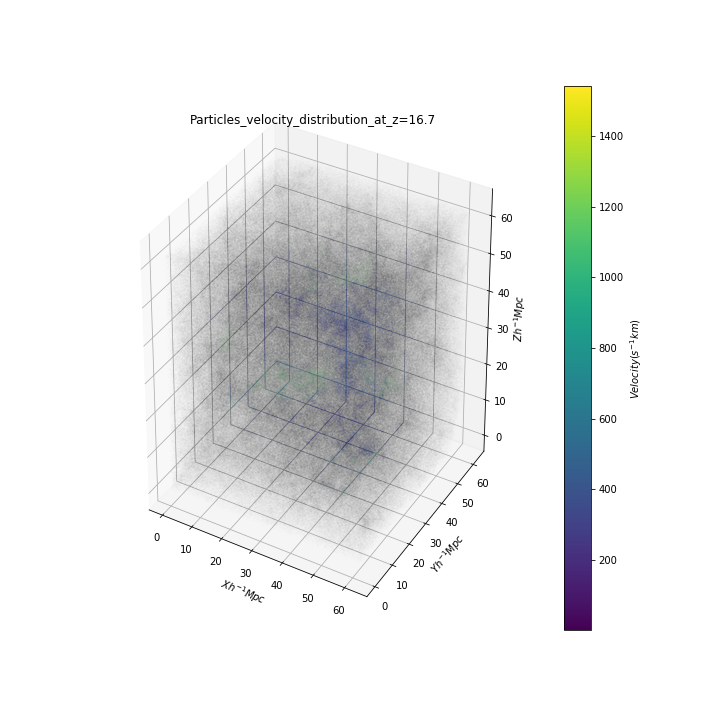

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/Saba/Documents/ML project/NLSFML/Data/position plots/"
Image(filename = PATH + "Particles_velocity_distribution_at_z=16.7.png", width=800, height=800)

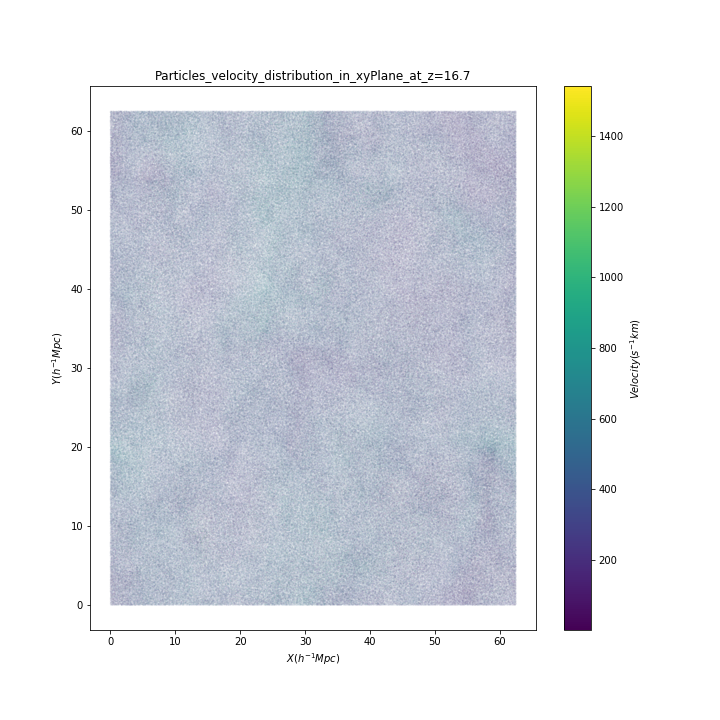

In [15]:
Image(filename = PATH + "Particles_velocity_distribution_in_xyPlane_at_z=16.7.png", width=800, height=800)

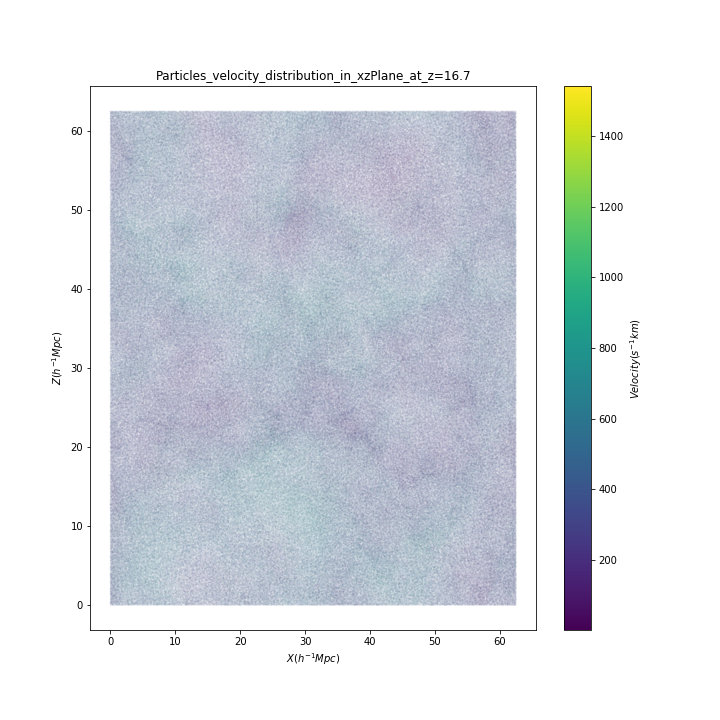

In [17]:
Image(filename = PATH + "Particles_velocity_distribution_in_xzPlane_at_z=16.7.png", width=800, height=800)

**Snap 0, z = 127**

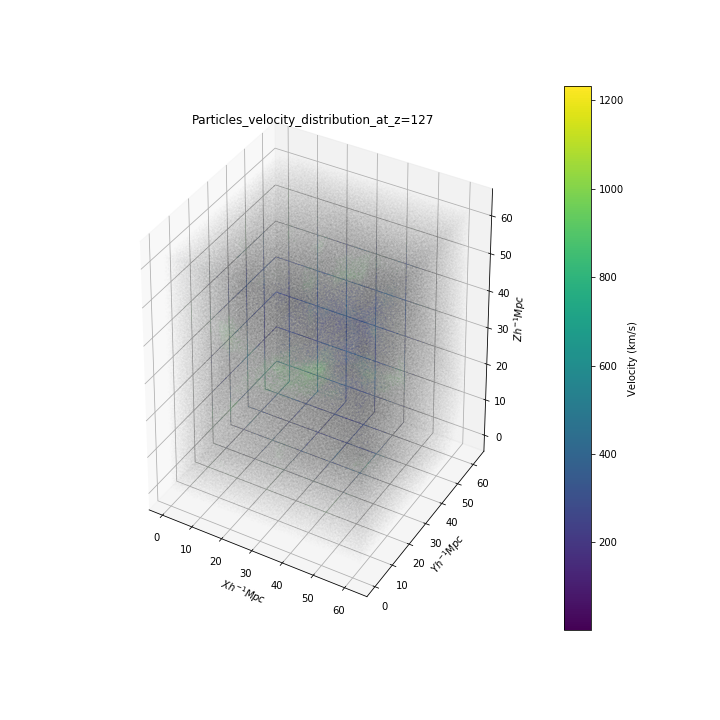

In [18]:
Image(filename = PATH + "Particles_velocity_distribution_at_z=127.png", width=800, height=800)

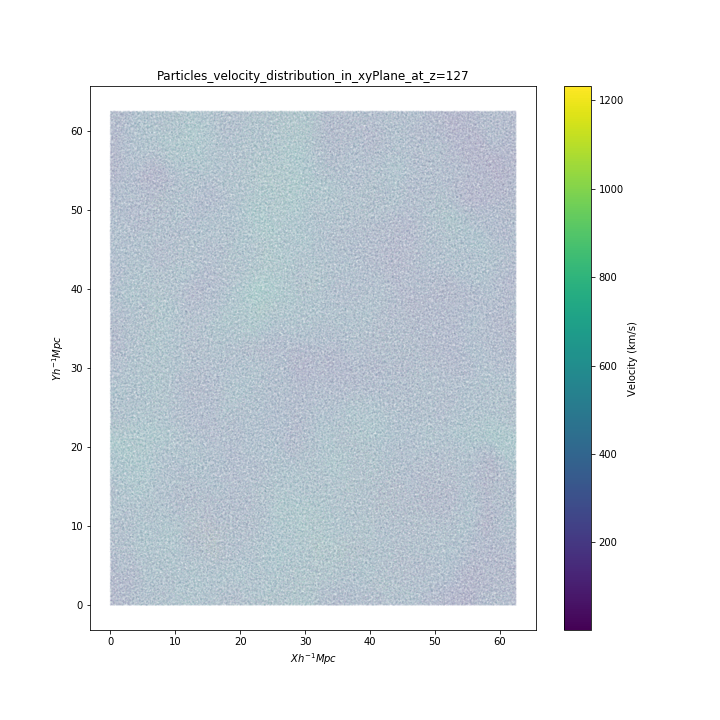

In [19]:
Image(filename = PATH + "Particles_velocity_distribution_in_xyPlane_at_z=127.png", width=800, height=800)

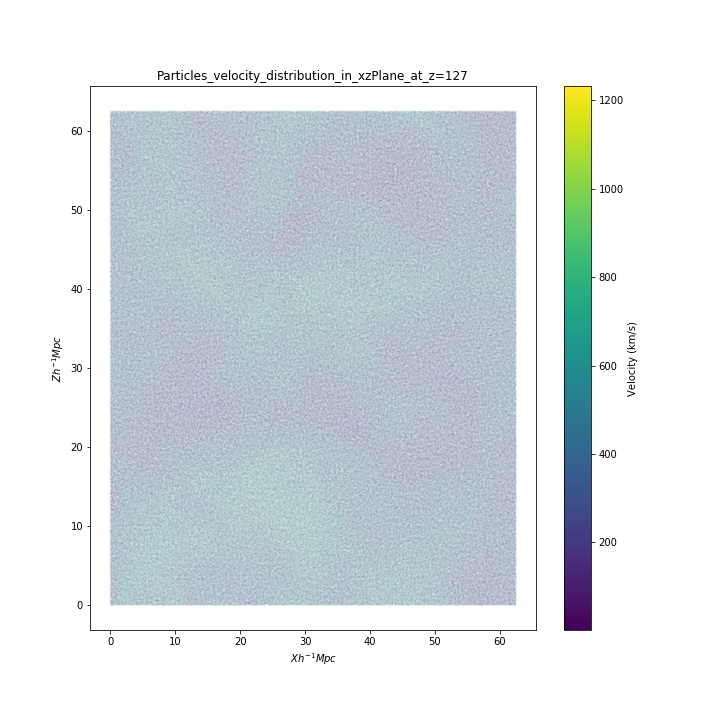

In [20]:
Image(filename = PATH + "Particles_velocity_distribution_in_xzPlane_at_z=127.png", width=800, height=800)

***For a more detailed physical analysis of the plots check out [Our Report.](https://github.com/Machine-Learning-in-Structure-formation/NLSFML/blob/master/Data/ML_Project_Part_1_Data.pdf)***

# Aknowledgement

On a millenium run: https://arxiv.org/abs/astro-ph/0608019

Springel, V . (2005), The cosmological simulation code GADGET-2, Mon. Not. R. Astron. Soc., 364, 1105: https://wwwmpa.mpa-garching.mpg.de/gadget/

Machine learning cosmological structure formation: https://arxiv.org/abs/1802.04271

Andrew Pontzen Luisa Lucie-Smith Hiranya V. Peiris. “An interpretable machine learning framework for dark matter halo formation”. In: (2019). url: https://arxiv.org/abs/1906.06339.

Andrew R. Zentner. “The Excursion Set Theory of Halo Mass Functions, Halo Clustering, and Halo Growth”. In: (2006). url: https://arxiv.org/ abs/astro-ph/0611454.